# Logistic Regression:

### Dataset : Bank-full.csv

#### Problem statement: y. Whether the client has subscribed a term deposit or not ?

### Importing required Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the Dataset:

In [2]:
# Use sep=';' (as the file contains delimiters to separate the values)

df = pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 6 - Logistic Regression/bank-full.csv",sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Performing EDA:

In [4]:
df.shape

(45211, 17)

In [5]:
#Checking null values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#Checking the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#Changing the categorical value to numerical by creating dummies

df1 = pd.get_dummies(df, columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
df1['y'] = df1['y'].replace('yes',1)
df1['y'] = df1['y'].replace('no',0)
df1

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_admin.           45211 non-null  uint8
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

### Model Creation:

In [9]:
#Dividing our data into input and output variables:

X = pd.concat([df1.iloc[:,0:7], df1.iloc[:,8:]],axis=1)
Y = df1.iloc[:,7]

In [10]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [11]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

### Fitting the Model:

In [12]:
#Logistic Regression and fit the model

classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [13]:
classifier.coef_

array([[-2.42464531e-02,  2.65782416e-05, -9.79744461e-03,
         3.86313787e-03, -3.91620923e-01,  1.89083368e-03,
        -6.57470018e-02, -2.38131020e-02, -2.32511042e-01,
        -2.51000331e-02, -8.65616417e-03,  5.91685812e-03,
         1.52959165e-01, -1.50803219e-02, -8.17713647e-02,
         2.74712477e-02, -6.47357490e-02,  2.27286635e-03,
         2.04006606e-03,  1.52607274e-02, -1.60027318e-01,
        -1.16240984e-01, -6.45830393e-02, -2.50873206e-01,
         4.22058706e-02,  1.22428011e-02, -2.42344919e-01,
        -1.86626550e-02,  3.33127097e-01, -5.94134671e-01,
        -7.74838391e-02, -1.83523735e-01,  8.48479579e-02,
         4.61352430e-02, -3.91990775e-01,  4.04815142e-02,
         1.73304343e-02,  2.66106146e-02, -1.38967935e-02,
        -1.30898782e-02, -7.91558679e-02, -5.23585106e-02,
         8.06209406e-02, -3.76428919e-01, -5.17834653e-02,
         9.15872658e-02,  6.90750907e-02, -1.24396210e-01,
        -2.89956077e-02,  2.89728138e-01, -3.97343894e-0

In [14]:
Beta_Coefficients = pd.Series(classifier.coef_[0])
Beta_Coefficients

0    -0.024246
1     0.000027
2    -0.009797
3     0.003863
4    -0.391621
5     0.001891
6    -0.065747
7    -0.023813
8    -0.232511
9    -0.025100
10   -0.008656
11    0.005917
12    0.152959
13   -0.015080
14   -0.081771
15    0.027471
16   -0.064736
17    0.002273
18    0.002040
19    0.015261
20   -0.160027
21   -0.116241
22   -0.064583
23   -0.250873
24    0.042206
25    0.012243
26   -0.242345
27   -0.018663
28    0.333127
29   -0.594135
30   -0.077484
31   -0.183524
32    0.084848
33    0.046135
34   -0.391991
35    0.040482
36    0.017330
37    0.026611
38   -0.013897
39   -0.013090
40   -0.079156
41   -0.052359
42    0.080621
43   -0.376429
44   -0.051783
45    0.091587
46    0.069075
47   -0.124396
48   -0.028996
49    0.289728
50   -0.397344
dtype: float64

In [15]:
Coef_df = pd.DataFrame({'Variables':['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],'Beta_Coefficients':Beta_Coefficients})
Coef_df

,Variables,Beta_Coefficients
0,age,-0.024246
1,balance,0.000027
2,day,-0.009797
3,duration,0.003863
4,campaign,-0.391621
5,pdays,0.001891
6,previous,-0.065747
7,job_admin.,-0.023813
8,job_blue-collar,-0.232511
9,job_entrepreneur,-0.025100


In [16]:
classifier.intercept_

array([-0.2610323])

In [17]:
classifier.classes_

array([0, 1], dtype=int64)

In [18]:
import numpy as np
from numpy import set_printoptions
np.set_printoptions(suppress=True)
classifier.predict_proba(X)[0:20]

array([[0.96217482, 0.03782518],
       [0.97582225, 0.02417775],
       [0.97878867, 0.02121133],
       [0.98030891, 0.01969109],
       [0.88007702, 0.11992298],
       [0.9608596 , 0.0391404 ],
       [0.94192201, 0.05807799],
       [0.88869847, 0.11130153],
       [0.9831238 , 0.0168762 ],
       [0.98252702, 0.01747298],
       [0.95976672, 0.04023328],
       [0.96570031, 0.03429969],
       [0.92734172, 0.07265828],
       [0.98410774, 0.01589226],
       [0.98168385, 0.01831615],
       [0.93829529, 0.06170471],
       [0.97399778, 0.02600222],
       [0.98872966, 0.01127034],
       [0.9695892 , 0.0304108 ],
       [0.97951679, 0.02048321]])

In [19]:
classifier.score(X,Y)

0.8913096370352348

Probability < 0.5, Class = 0.

Probability > 0.5, Class = 1.

(Condition applicable for all the observations)

In [20]:
#Predictions for X dataset

y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
y_pred_df = pd.DataFrame({'Actual':Y,
                         'Predicted':classifier.predict(X)})
y_pred_df[0:30]

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Actual = 0, Predicted = 0. (True Negative)

Actual = 0, Predicted = 1. (False Positive)

Actual = 1, Predicted = 0. (False Negative)

Actual = 1, Predicted = 1. (True Positive)

In [22]:
'''With the code below, we are finding out the cases where the model predictions match the actual values in the data and cross-checking the accuracy of the model'''

print(len(y_pred_df[y_pred_df['Actual']==y_pred_df['Predicted']]))
print(len(y_pred_df))
print(len(y_pred_df[y_pred_df['Actual']==y_pred_df['Predicted']])/len(y_pred_df))

40297
45211
0.8913096370352348


### Confusion Matrix:

In [23]:
# Confusion Matrix for the model accuracy

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, y_pred)
print(cm)

[[39167   755]
 [ 4159  1130]]


**Left diagonal talks about the correct predictions by model.**

**Right diagonal  talks about incorrectly classified observations or errors.**

**The lesser the values in the right diagonal, the better is your model.**

In [24]:
pd.crosstab(Y,y_pred)

col_0,0,1
y,,
0,39167,755
1,4159,1130


In [25]:
TP = len(y_pred_df[(y_pred_df['Actual']==1) & (y_pred_df['Predicted']==1)])
TN = len(y_pred_df[(y_pred_df['Actual']==0) & (y_pred_df['Predicted']==0)])
FP = len(y_pred_df[(y_pred_df['Actual']==0) & (y_pred_df['Predicted']==1)])
FN = len(y_pred_df[(y_pred_df['Actual']==1) & (y_pred_df['Predicted']==0)])

print('True Negative :',TN)
print('False Positive :',FP)
print('False Negative :',FN)
print('True Positive :',TP)


True Negative : 39167
False Positive : 755
False Negative : 4159
True Positive : 1130


In [26]:
#Checking for Accuracy in terms of percentage

Accuracy = (TP+TN)/(TP+FP+TN+FN)*100
print('Accuracy :',round(Accuracy,2))

Accuracy : 89.13


In [27]:
#Checking for Sensitivity/Recall

Sensitivity = (TP/(TP+FN))*100
print('Sensitivity :',round(Sensitivity,2))

Sensitivity : 21.37


In [28]:
#Checking for Specificity

Specificity = (TN/(TN+FP))*100
print('Specificity :',round(Specificity,2))

Specificity : 98.11


In [29]:
#Checking for Precision

Precision = (TP)/(TP+FP)*100
print('Precision :',round(Precision,2))

Precision : 59.95


### Checking F-Score:

In [30]:
F_Score= (2*Precision*Sensitivity)/(Precision+Sensitivity)
print('F-Score :',round(F_Score,2))

F-Score : 31.5


### Classification Report:

In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



### ROC Curve:

0.5973695477783114


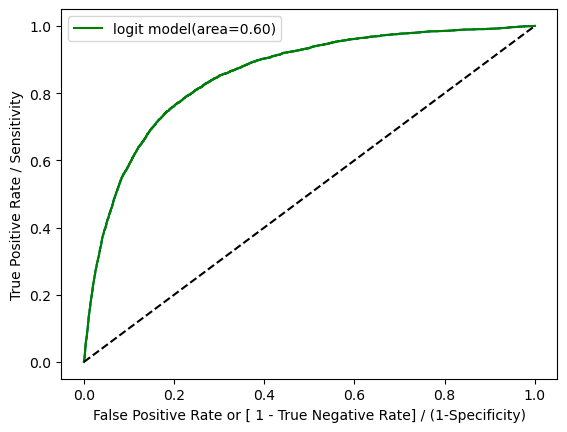

Auc accuracy: 0.5973695477783114


In [32]:
#ROC = Receiver Operating Curve
#AUC = Area Under Curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr)
auc=roc_auc_score(Y,y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='green', label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [ 1 - True Negative Rate] / (1-Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')
plt.legend()
plt.show()

print('Auc accuracy:', auc)